### Task 2
Supervised Machine Learning

Linear Regression

In [1]:
#For Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as cm
import seaborn as sns
sns.set()

url = "http://bit.ly/w-data"
df=pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [2]:
df.shape

(25, 2)

**The Data has 25 rows and 2 columns**
1. Hours of Study
2. Corresponding Scores

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Average hours of study**

In [4]:
df['Hours'].mean() #equivalent to 5hrs

5.012

**Average Score**

In [5]:
df['Scores'].mean()

51.48

**Score corresponding to maximum hours of study**

In [6]:
df.iloc[df['Hours'].idxmax()]

Hours      9.2
Scores    88.0
Name: 6, dtype: float64

**Score corresponding to minimum hours of study**

In [7]:
df.iloc[df['Hours'].idxmin()]

Hours      1.1
Scores    17.0
Name: 14, dtype: float64

We can see that the scores are in range of 17.0 to 95 in the given data.
Generally 33/100 are regarded as passing marks.

**Failed Students**

In [8]:
df[df['Scores']<33].sort_values(by='Scores').style.background_gradient(subset=['Scores'],cmap='OrRd_r')

,Hours,Scores
14,1.100000,17
5,1.500000,20
0,2.500000,21
17,1.900000,24
9,2.700000,25
2,3.200000,27
4,3.500000,30
16,2.500000,30
20,2.700000,30


**Passed Students**

In [9]:
df[df['Scores']>=33].sort_values(by='Scores',ascending=False).style.background_gradient(subset=['Scores'],cmap="Greens")

,Hours,Scores
15,8.900000,95
6,9.200000,88
24,7.800000,86
10,7.700000,85
8,8.300000,81
23,6.900000,76
3,8.500000,75
19,7.400000,69
18,6.100000,67
11,5.900000,62


The topper studied for 8.9 hours.

In [10]:
df1=df.copy()
df1.index=df1['Hours']
df1.drop('Hours',axis=1,inplace=True)

In [11]:
df1.index=df1.index.astype('int')

**Plotting hours vs Scores for 2 groups**

1. Passed Class
2. Failed Class

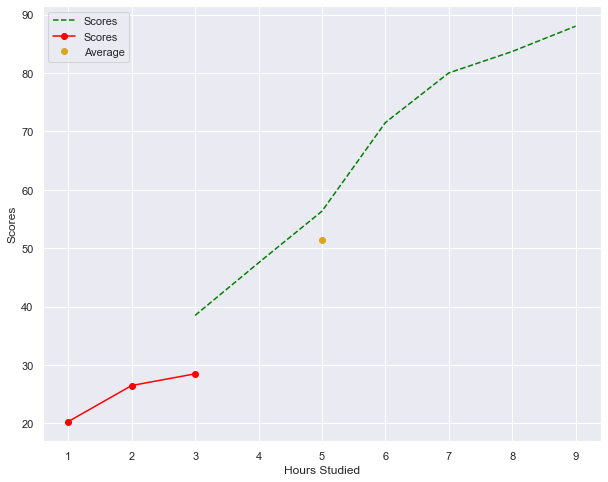

In [12]:
passed=df1.loc[df1.Scores>=33]
failed=df1.loc[df1.Scores<33]
ax=passed.groupby(passed.index).aggregate('mean').plot(style=['--'],color='Green',figsize=(10,8))
failed.groupby(failed.index).aggregate('mean').plot(ax=ax,style=['-o'],color='Red')
plt.plot(5,51.48,'ro',color='goldenrod',label="Average")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
# plt.title("Distribution of Scores")
plt.legend()

The graph says that a linear trend has been followed.

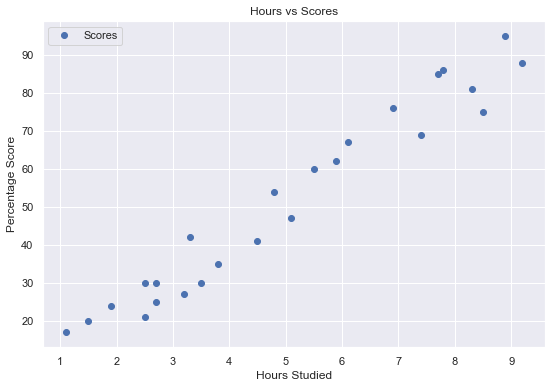

In [13]:
df.plot(x='Hours', y='Scores', style='o',figsize=(9,6))  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### **Training**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
#Dividing the data into data and labels
X=df['Hours'].values[:,np.newaxis]
y=df['Scores'].values[:,np.newaxis]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print("X Train",x_train.shape)
print("X Test",x_test.shape)
print("Y Train",y_train.shape)
print("Y Test",y_test.shape)

X Train (20, 1)
X Test (5, 1)
Y Train (20, 1)
Y Test (5, 1)


In [18]:
l=LinearRegression()
l.fit(x_train,y_train)
print("Training Complete.")

Training Complete.


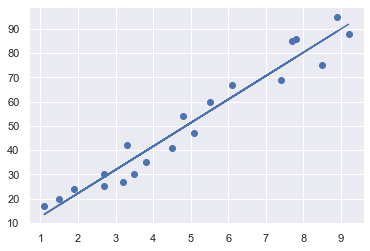

In [19]:
line=l.coef_*x_train+l.intercept_
plt.scatter(x_train,y_train)
plt.plot(x_train,line)

#### Predicting

In [20]:
y_pred=l.predict(x_test).reshape(-1)

In [21]:
y_test

array([[81],
       [30],
       [21],
       [76],
       [62]], dtype=int64)

In [22]:
df2=pd.DataFrame({
    'Predicted':y_pred,
    'Actual':y_test.reshape(-1)})

df2.index=np.arange(5)
df2

,Predicted,Actual
0,83.188141,81
1,27.032088,30
2,27.032088,21
3,69.633232,76
4,59.951153,62


In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', \
metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


Let's Predict the Scores-
1. 9.25
2. 7.8
3. 4.1
4. 2

In [24]:
hours=[9.25,7.8,4.1,2]
n=np.array([9.25,7.8,4.1,2])[:,np.newaxis]

In [25]:
p=l.predict(n)
for h in range(len(hours)):
    print("{0:20s} {1}".format("Hours Studied-",hours[h]))
    print("{0:20s} {1}".format("Scores Achieved-",round(p[h][0],1)))
    print("\n")

Hours Studied-       9.25
Scores Achieved-     92.4


Hours Studied-       7.8
Scores Achieved-     78.3


Hours Studied-       4.1
Scores Achieved-     42.5


Hours Studied-       2
Scores Achieved-     22.2




###                                                                 Thanks